<a href="https://colab.research.google.com/github/MathieuForge/Moneyradar/blob/main/luxe_france.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

LVMH=pd.read_csv('LVMH.csv')
Hermes=pd.read_csv('hermes.csv')
Kering=pd.read_csv('kering.csv')

LVMH.info()
Hermes.info()
Kering.info()

LVMH.head()
Hermes.head()
Kering.head()

LVMH.describe()
Hermes.describe()
Kering.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      177 non-null    object 
 1   Price     177 non-null    float64
 2   Open      177 non-null    float64
 3   High      177 non-null    float64
 4   Low       177 non-null    float64
 5   Vol.      177 non-null    object 
 6   Change %  177 non-null    object 
dtypes: float64(4), object(3)
memory usage: 9.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      177 non-null    object
 1   Price     177 non-null    object
 2   Open      177 non-null    object
 3   High      177 non-null    object
 4   Low       177 non-null    object
 5   Vol.      177 non-null    object
 6   Change %  177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB
<class 

<bound method NDFrame.describe of            Date   Price    Open    High     Low    Vol. Change %
0    09/01/2024  228.30  254.90  260.80  225.95   1.75M  -11.85%
1    08/01/2024  259.00  283.35  284.25  246.70   6.09M   -8.96%
2    07/01/2024  284.50  344.55  346.90  270.40   5.87M  -15.95%
3    06/01/2024  338.50  320.50  346.35  299.20   5.20M    6.72%
4    05/01/2024  317.20  322.65  342.90  316.95   4.46M   -3.88%
..          ...     ...     ...     ...     ...     ...      ...
172  05/01/2010   89.60   92.29   96.59   81.67  15.24M   -3.35%
173  04/01/2010   92.71   90.92  101.34   90.18  11.35M    2.93%
174  03/01/2010   90.07   78.04   90.47   77.71  11.60M   16.94%
175  02/01/2010   77.02   80.42   82.69   74.02  10.29M   -4.71%
176  01/01/2010   80.83   76.98   84.11   76.34   8.18M    5.00%

[177 rows x 7 columns]>

In [2]:
# Nettoyer la colonne 'Price' de Hermes en remplaçant les virgules par des chaînes vides
Hermes['Price'] = Hermes['Price'].str.replace(',', '')

# Puis convertir la colonne 'Price' en float
Hermes['Price'] = pd.to_numeric(Hermes['Price'], errors='coerce')

# Afficher pour vérifier le résultat
print(Hermes['Price'].head())


0    1904.5
1    2169.0
2    2023.0
3    2140.0
4    2176.0
Name: Price, dtype: float64


In [3]:
import pandas as pd

# Conversion des colonnes 'Date' en datetime
LVMH['Date'] = pd.to_datetime(LVMH['Date'], errors='coerce')
Hermes['Date'] = pd.to_datetime(Hermes['Date'], errors='coerce')
Kering['Date'] = pd.to_datetime(Kering['Date'], errors='coerce')

# Conversion des colonnes 'Price' en float si elles sont au format object
LVMH['Price'] = pd.to_numeric(LVMH['Price'], errors='coerce')
Hermes['Price'] = pd.to_numeric(Hermes['Price'], errors='coerce')
Kering['Price'] = pd.to_numeric(Kering['Price'], errors='coerce')

# Renommer les colonnes 'Price' pour éviter les conflits
LVMH = LVMH[['Date', 'Price']].rename(columns={'Price': 'Price_LVMH'})
Hermes = Hermes[['Date', 'Price']].rename(columns={'Price': 'Price_Hermes'})
Kering = Kering[['Date', 'Price']].rename(columns={'Price': 'Price_Kering'})

# Fusionner les DataFrames sur la colonne 'Date'
df_final = pd.merge(LVMH, Hermes, on='Date', how='inner')
df_final = pd.merge(df_final, Kering, on='Date', how='inner')

# Afficher le DataFrame final
print(df_final)


          Date  Price_LVMH  Price_Hermes  Price_Kering
0   2024-09-01      615.30       1904.50        228.30
1   2024-08-01      674.30       2169.00        259.00
2   2024-07-01      653.00       2023.00        284.50
3   2024-06-01      713.60       2140.00        338.50
4   2024-05-01      734.90       2176.00        317.20
..         ...         ...           ...           ...
172 2010-05-01       77.70        107.60         89.60
173 2010-04-01       78.26         99.63         92.71
174 2010-03-01       77.99        102.85         90.07
175 2010-02-01       71.74         98.99         77.02
176 2010-01-01       71.26         99.65         80.83

[177 rows x 4 columns]


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          177 non-null    datetime64[ns]
 1   Price_LVMH    177 non-null    float64       
 2   Price_Hermes  177 non-null    float64       
 3   Price_Kering  177 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.7 KB


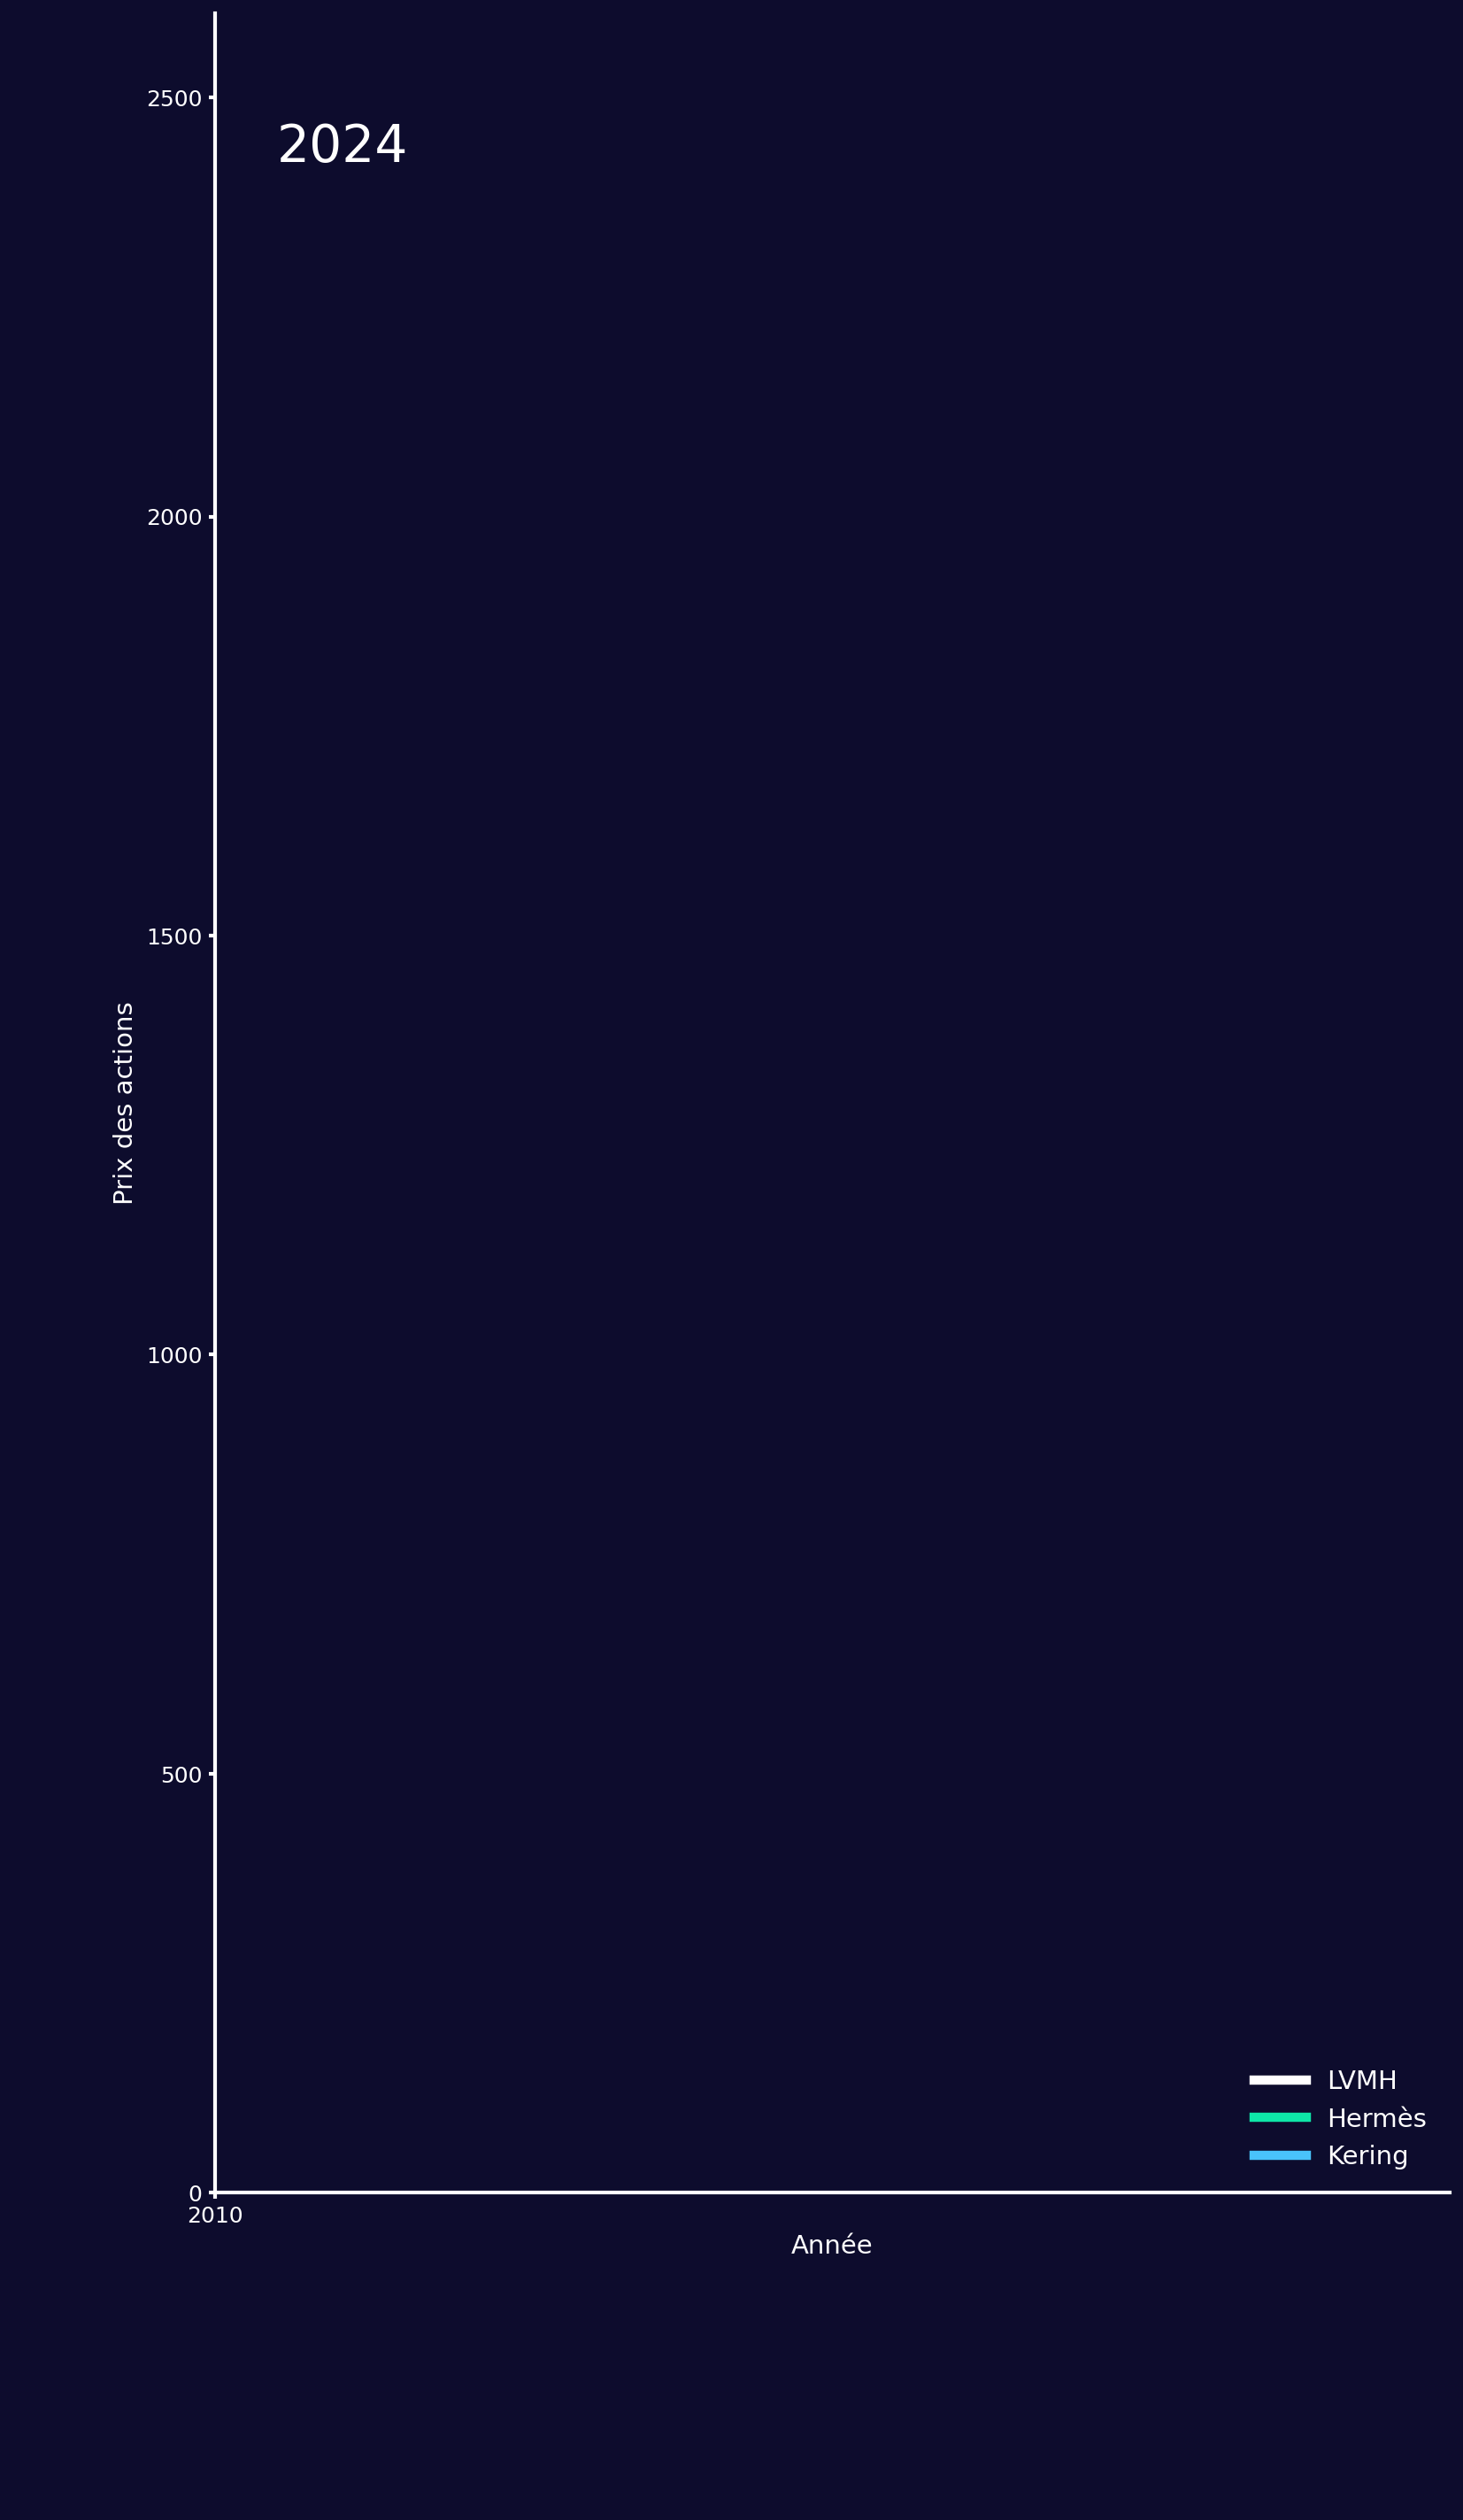

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Convertir la colonne 'Date' en format datetime
df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce')

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir les colonnes en float pour l'interpolation
df_final['Price_LVMH'] = pd.to_numeric(df_final['Price_LVMH'], errors='coerce')
df_final['Price_Hermes'] = pd.to_numeric(df_final['Price_Hermes'], errors='coerce')
df_final['Price_Kering'] = pd.to_numeric(df_final['Price_Kering'], errors='coerce')

# Interpolation pour combler les valeurs manquantes après fusion
df_final['Price_LVMH'] = df_final['Price_LVMH'].interpolate()
df_final['Price_Hermes'] = df_final['Price_Hermes'].interpolate()
df_final['Price_Kering'] = df_final['Price_Kering'].interpolate()

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_final.ffill(inplace=True)
df_final.fillna(0, inplace=True)

# Inverser l'ordre des dates
df_final = df_final.sort_values(by='Date')

# Sous-échantillonnage des données pour lisser les courbes
step = 5
x_data_reduced = df_final['Date'][::step].values
y_data_lvmh_reduced = df_final['Price_LVMH'][::step].values
y_data_hermes_reduced = df_final['Price_Hermes'][::step].values
y_data_kering_reduced = df_final['Price_Kering'][::step].values

# Préparation des données pour l'interpolation et l'animation
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data_reduced) - 1, total_frames)

# Interpolation des dates et des prix
x_data_reduced = np.array([pd.Timestamp(d).value for d in x_data_reduced])
x_interp = np.interp(time_interp, np.arange(len(x_data_reduced)), x_data_reduced)
x_interp = pd.to_datetime(x_interp)

y_interp_lvmh = np.interp(time_interp, np.arange(len(y_data_lvmh_reduced)), y_data_lvmh_reduced)
y_interp_hermes = np.interp(time_interp, np.arange(len(y_data_hermes_reduced)), y_data_hermes_reduced)
y_interp_kering = np.interp(time_interp, np.arange(len(y_data_kering_reduced)), y_data_kering_reduced)

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
colors = {'LVMH': 'white', 'Hermes': '#0EE7A8', 'Kering': '#49C3FB'}

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=12, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Lignes de données avec une épaisseur de ligne augmentée
line_lvmh, = ax1.plot([], [], lw=5, color=colors['LVMH'], label='LVMH')
line_hermes, = ax1.plot([], [], lw=5, color=colors['Hermes'], label='Hermès')
line_kering, = ax1.plot([], [], lw=5, color=colors['Kering'], label='Kering')

# Initialiser l'animation
def init():
    line_lvmh.set_data([], [])
    line_hermes.set_data([], [])
    line_kering.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, max(y_interp_lvmh.max(), y_interp_hermes.max(), y_interp_kering.max()) * 1.1)
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Prix des actions', fontsize=14, color='white')

    # Ajouter un compteur de date avec une taille de texte augmentée
    global date_counter
    date_counter = ax1.text(
        0.05, 0.95, '', transform=ax1.transAxes,
        fontsize=28, color='white', verticalalignment='top'
    )

    return line_lvmh, line_hermes, line_kering, date_counter

# Fonction de mise à jour de l'animation avec dézoom progressif et annotations
def update(frame):
    if frame < len(x_interp):
        line_lvmh.set_data(x_interp[:frame], y_interp_lvmh[:frame])
        line_hermes.set_data(x_interp[:frame], y_interp_hermes[:frame])
        line_kering.set_data(x_interp[:frame], y_interp_kering[:frame])

    if frame > 0:
        current_max_lvmh = np.nanmax(y_interp_lvmh[:frame]) * 1.1
        current_max_hermes = np.nanmax(y_interp_hermes[:frame]) * 1.1
        current_max_kering = np.nanmax(y_interp_kering[:frame]) * 1.1
        ax1.set_ylim(0, max(current_max_lvmh, current_max_hermes, current_max_kering))

        # Ajuster la plage de l'axe x pour inclure une marge de 3 ans à droite
        margin_years = 3
        end_date = x_interp.max() + pd.DateOffset(years=margin_years)
        ax1.set_xlim(x_interp.min(), end_date)

        for ann in ax1.texts:
            if ann != date_counter:
                ann.remove()

        # Ajouter les annotations de valeurs en euros
        ax1.annotate(
            f"{y_interp_lvmh[frame]:.2f} €", (x_interp[frame], y_interp_lvmh[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=colors['LVMH'], fontsize=24
        )
        ax1.annotate(
            f"{y_interp_hermes[frame]:.2f} €", (x_interp[frame], y_interp_hermes[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=colors['Hermes'], fontsize=24
        )
        ax1.annotate(
            f"{y_interp_kering[frame]:.2f} €", (x_interp[frame], y_interp_kering[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=colors['Kering'], fontsize=24
        )

        date_str = x_interp[frame].strftime('%Y')
        date_counter.set_text(date_str)

    return line_lvmh, line_hermes, line_kering, date_counter

# Créer l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Ajouter les légendes après la création des lignes, hors des fonctions init/update
ax1.legend(loc='lower right', fontsize=14, frameon=False, labelcolor='white', bbox_to_anchor=(0.95, 0.05))

# Sauvegarder et afficher l'animation
ani.save('luxury_stocks_animation.mp4', writer='ffmpeg')
HTML('<video controls src="luxury_stocks_animation.mp4" type="video/mp4">')


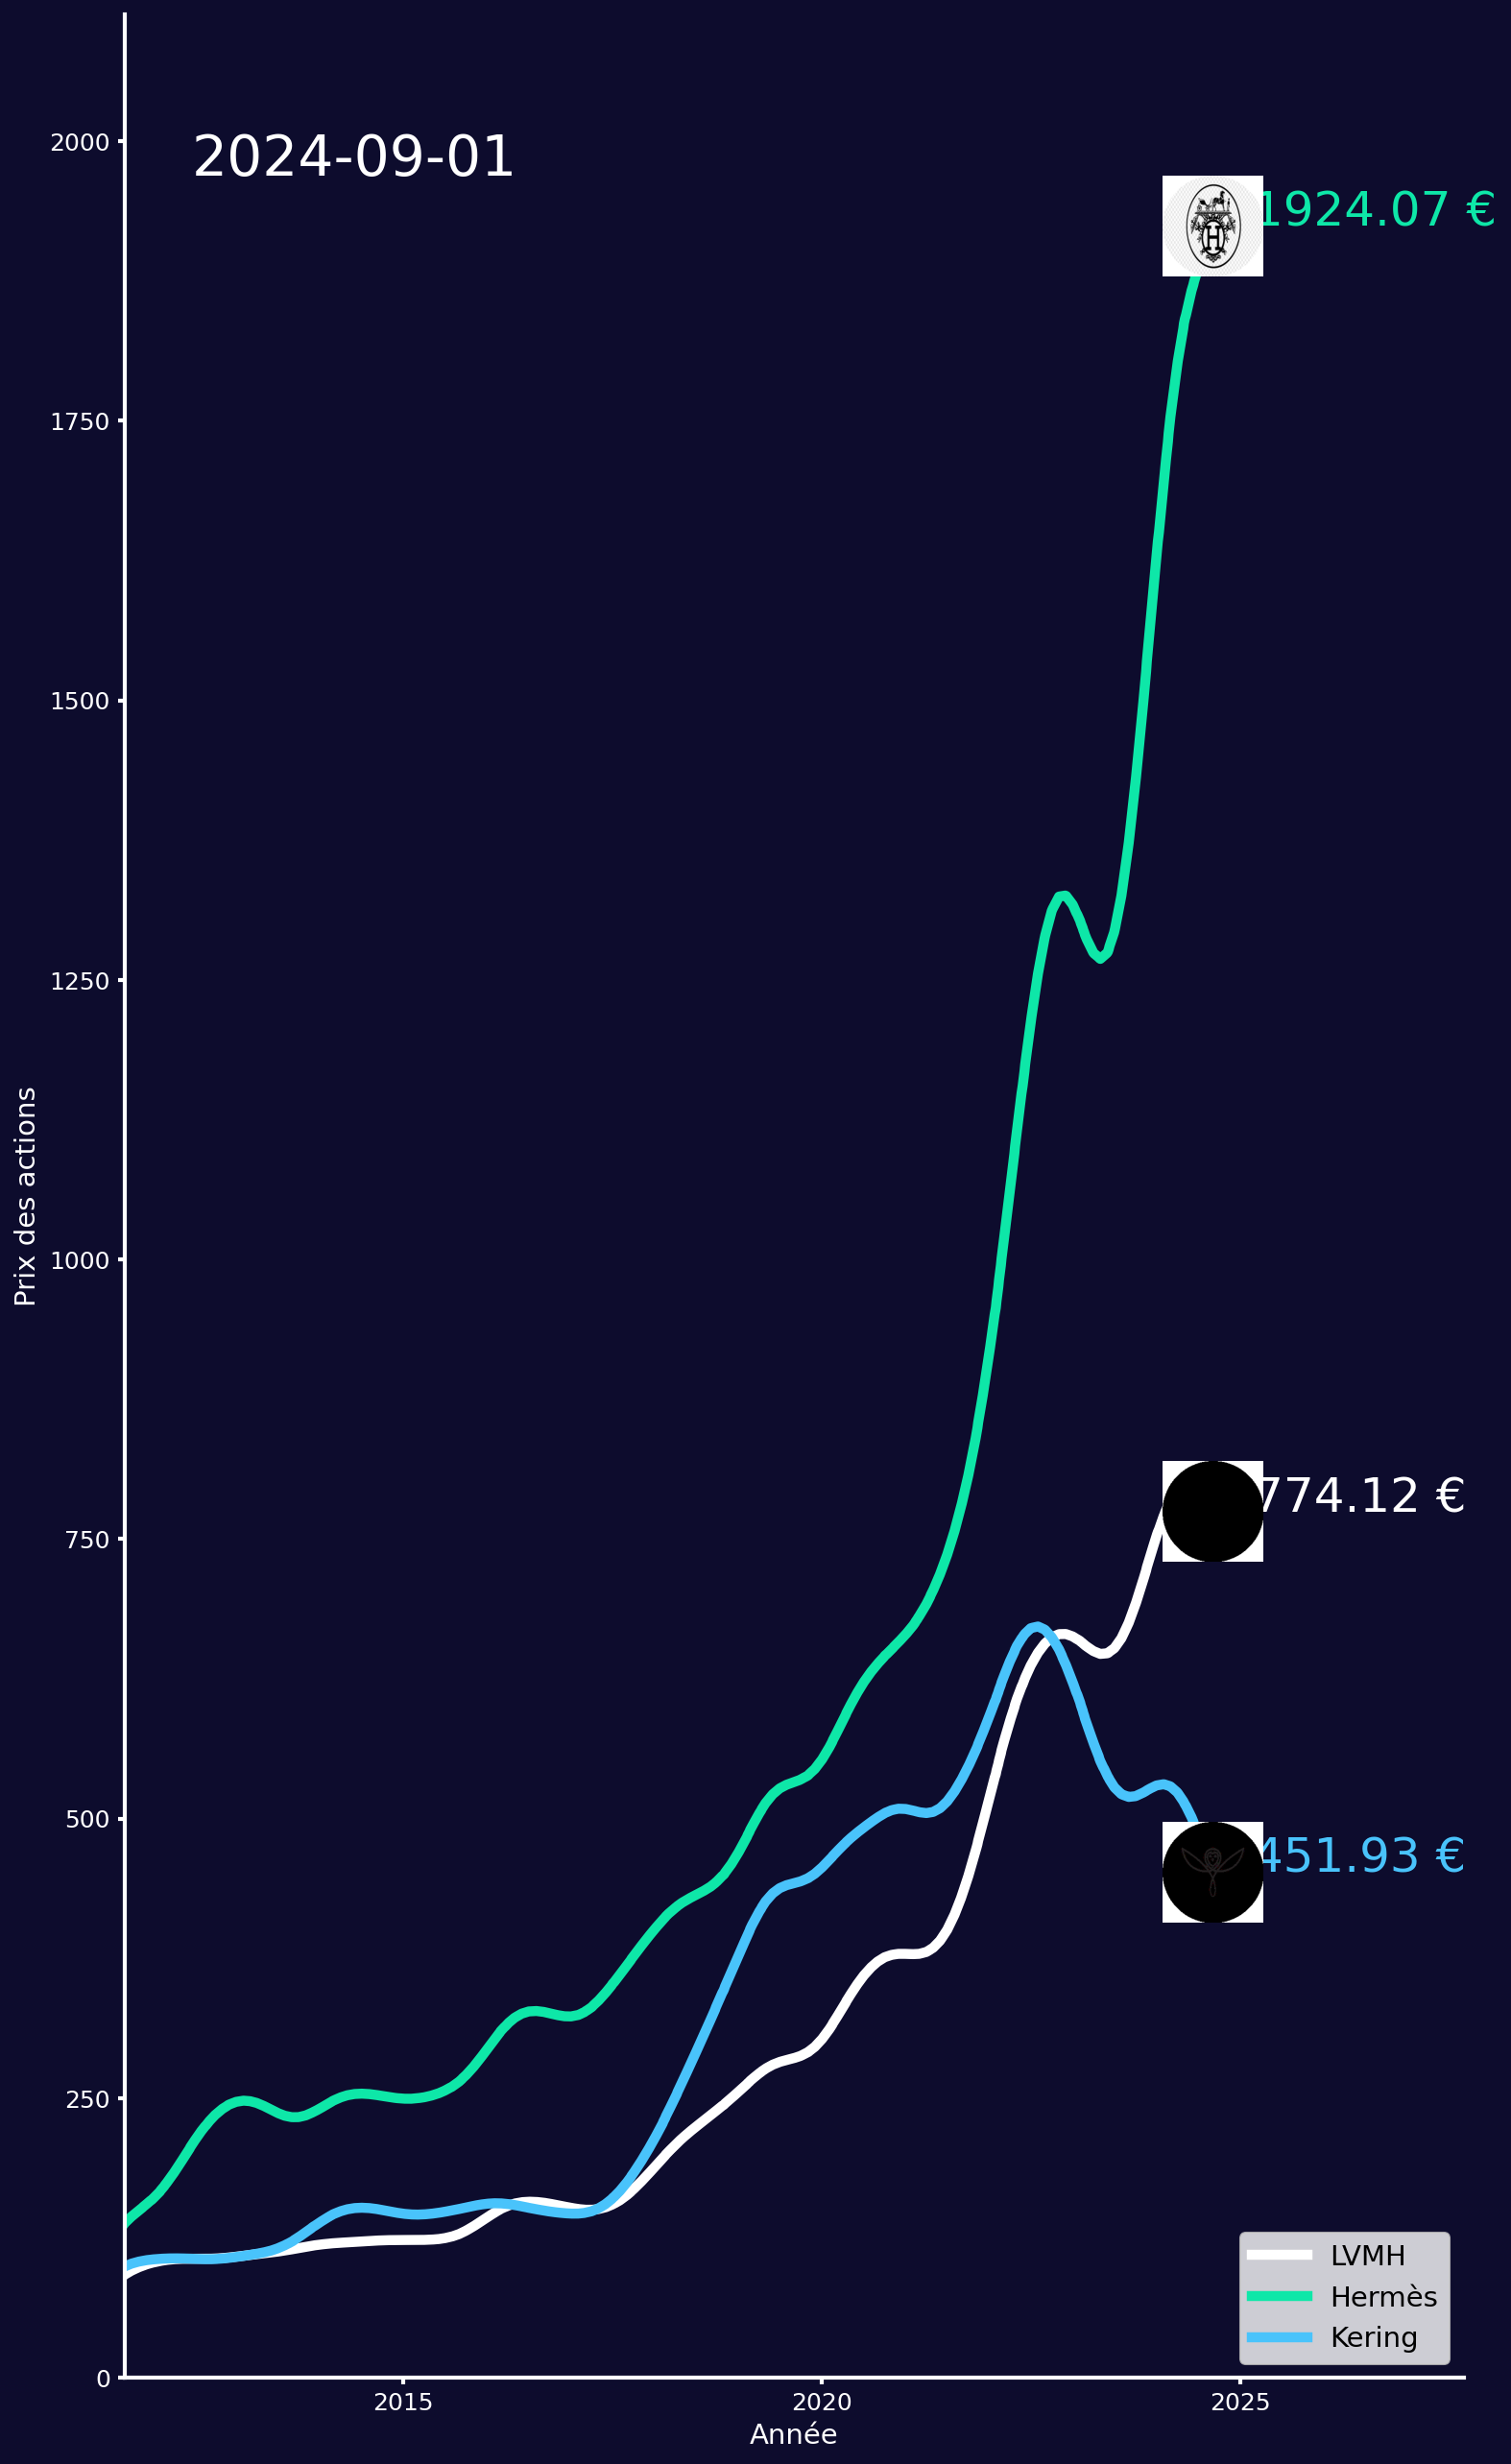

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageDraw
from datetime import datetime

def circular_logo_with_background(image_path, size, background_color=(255, 255, 255)):
    # Ouvrir l'image du logo
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    # Créer un fond blanc circulaire
    background = Image.new("RGBA", size, background_color)
    mask = Image.new("L", size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + size, fill=255)

    # Appliquer le masque circulaire
    logo_with_background = Image.composite(img, background, mask)

    # Convertir le résultat en mode 'RGB'
    logo_with_background = logo_with_background.convert("RGB")

    return logo_with_background

# Charger les images des logos avec un masque circulaire et un fond blanc
logo_lvmh = circular_logo_with_background("logo_lvmh.png", (200, 200))
logo_hermes = circular_logo_with_background("logo_hermes.png", (200, 200))
logo_kering = circular_logo_with_background("logo_kering.png", (200, 200))

# Convertir les images PIL en tableaux numpy
logo_lvmh = np.array(logo_lvmh)
logo_hermes = np.array(logo_hermes)
logo_kering = np.array(logo_kering)


# Convertir la colonne 'Date' en format datetime
df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce')

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir les colonnes en float pour l'interpolation
df_final['Price_LVMH'] = pd.to_numeric(df_final['Price_LVMH'], errors='coerce')
df_final['Price_Hermes'] = pd.to_numeric(df_final['Price_Hermes'], errors='coerce')
df_final['Price_Kering'] = pd.to_numeric(df_final['Price_Kering'], errors='coerce')

# Interpolation pour combler les valeurs manquantes après fusion
df_final['Price_LVMH'] = df_final['Price_LVMH'].interpolate()
df_final['Price_Hermes'] = df_final['Price_Hermes'].interpolate()
df_final['Price_Kering'] = df_final['Price_Kering'].interpolate()

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_final.ffill(inplace=True)
df_final.fillna(0, inplace=True)

# Inverser l'ordre des dates
df_final = df_final.sort_values(by='Date')

# Appliquer une moyenne glissante (lissage) avec une fenêtre de 5 points
df_final['Price_LVMH'] = df_final['Price_LVMH'].rolling(window=5).mean()
df_final['Price_Hermes'] = df_final['Price_Hermes'].rolling(window=5).mean()
df_final['Price_Kering'] = df_final['Price_Kering'].rolling(window=5).mean()

# Supprimer les lignes contenant des NaN après le lissage
df_final = df_final.dropna(subset=['Price_LVMH', 'Price_Hermes', 'Price_Kering'])

# Préparer les données pour l'animation après avoir supprimé les NaN
x_data = df_final['Date'].values.astype('datetime64[D]')
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_lvmh = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_LVMH'])
y_interp_hermes = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_Hermes'])
y_interp_kering = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_Kering'])

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
colors = {'LVMH': 'white', 'Hermes': '#0EE7A8', 'Kering': '#49C3FB'}

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=12, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Lignes de données avec une épaisseur de ligne augmentée
line_lvmh, = ax1.plot([], [], lw=5, color=colors['LVMH'], label='LVMH')
line_hermes, = ax1.plot([], [], lw=5, color=colors['Hermes'], label='Hermès')
line_kering, = ax1.plot([], [], lw=5, color=colors['Kering'], label='Kering')

# Initialiser l'animation
def init():
    line_lvmh.set_data([], [])
    line_hermes.set_data([], [])
    line_kering.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, max(y_interp_lvmh.max(), y_interp_hermes.max(), y_interp_kering.max()) * 1.1)
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Prix des actions', fontsize=14, color='white')

    global date_counter
    date_counter = ax1.text(
        0.05, 0.95, '', transform=ax1.transAxes,
        fontsize=28, color='white', verticalalignment='top'
    )

    global logos, annotations
    logos = []
    annotations = []

    return line_lvmh, line_hermes, line_kering, date_counter

# Fonction de mise à jour de l'animation avec dézoom progressif et annotations
def update(frame):
    if frame < len(x_interp):
        line_lvmh.set_data(x_interp[:frame], y_interp_lvmh[:frame])
        line_hermes.set_data(x_interp[:frame], y_interp_hermes[:frame])
        line_kering.set_data(x_interp[:frame], y_interp_kering[:frame])

    if frame > 0:
        current_max_lvmh = np.nanmax(y_interp_lvmh[:frame]) * 1.1
        current_max_hermes = np.nanmax(y_interp_hermes[:frame]) * 1.1
        current_max_kering = np.nanmax(y_interp_kering[:frame]) * 1.1
        ax1.set_ylim(0, max(current_max_lvmh, current_max_hermes, current_max_kering))

        margin_years = 3
        end_date = x_interp.max() + np.timedelta64(margin_years * 365, 'D')
        ax1.set_xlim(x_interp.min(), end_date)

        for logo in logos:
            logo.remove()
        for ann in annotations:
            ann.remove()

        logos.clear()
        annotations.clear()

        annotations.append(
            ax1.annotate(
                f"{y_interp_lvmh[frame]:.2f} €", (x_interp[frame], y_interp_lvmh[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['LVMH'], fontsize=24
            )
        )
        annotations.append(
            ax1.annotate(
                f"{y_interp_hermes[frame]:.2f} €", (x_interp[frame], y_interp_hermes[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['Hermes'], fontsize=24
            )
        )
        annotations.append(
            ax1.annotate(
                f"{y_interp_kering[frame]:.2f} €", (x_interp[frame], y_interp_kering[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['Kering'], fontsize=24
            )
        )

        imagebox_lvmh = OffsetImage(logo_lvmh, zoom=0.25, resample=True)
        imagebox_hermes = OffsetImage(logo_hermes, zoom=0.25, resample=True)
        imagebox_kering = OffsetImage(logo_kering, zoom=0.25, resample=True)

        logo_lvmh_ab = AnnotationBbox(imagebox_lvmh, (x_interp[frame], y_interp_lvmh[frame]), frameon=False)
        logo_hermes_ab = AnnotationBbox(imagebox_hermes, (x_interp[frame], y_interp_hermes[frame]), frameon=False)
        logo_kering_ab = AnnotationBbox(imagebox_kering, (x_interp[frame], y_interp_kering[frame]), frameon=False)

        logos.extend([ax1.add_artist(logo_lvmh_ab), ax1.add_artist(logo_hermes_ab), ax1.add_artist(logo_kering_ab)])

        date_counter.set_text(f"{str(x_interp[frame])[:10]}")

    return line_lvmh, line_hermes, line_kering, date_counter

# Création de l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60)

plt.legend(loc='lower right', fontsize=14)

# Sauvegarder l'animation (optionnel)
ani.save("stock_prices_animation.mp4", fps=60, dpi=150)


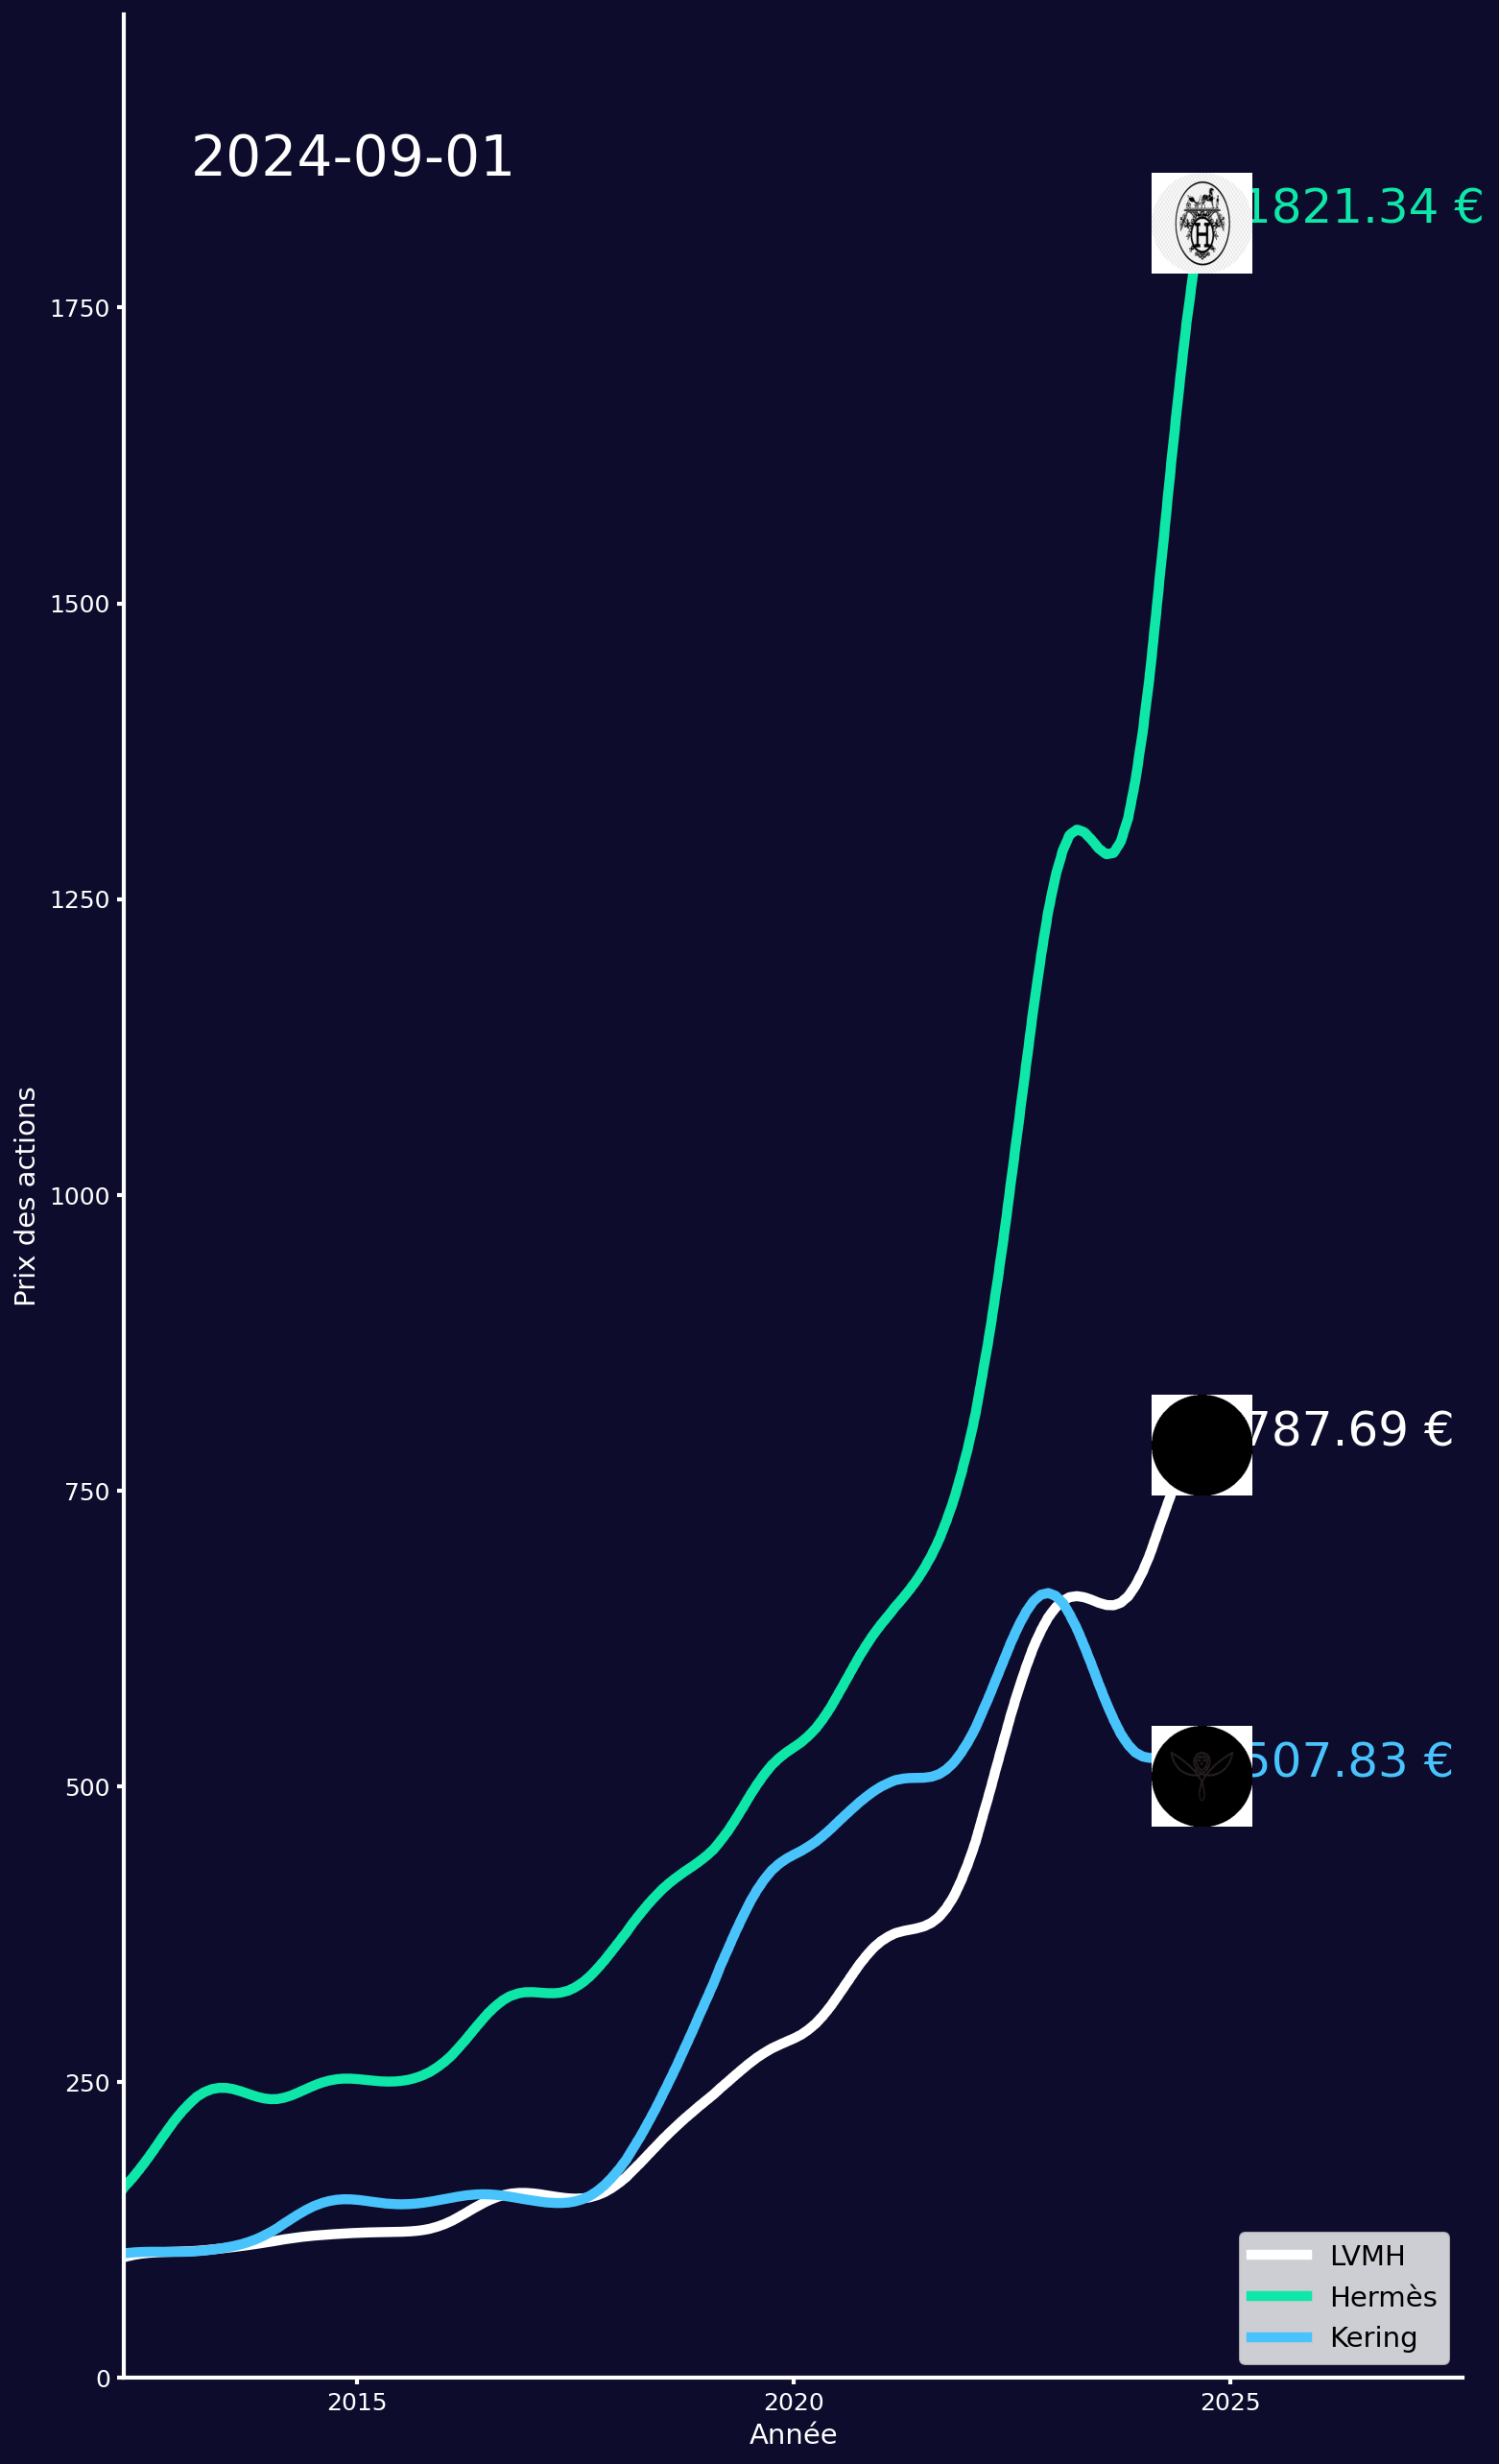

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageDraw
from datetime import datetime

def circular_logo_with_background(image_path, size, background_color=(255, 255, 255)):
    # Ouvrir l'image du logo
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    # Créer un fond blanc circulaire
    background = Image.new("RGBA", size, (0, 0, 0, 0))  # Transparent
    mask = Image.new("L", size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + size, fill=255)

    # Appliquer le masque circulaire
    logo_with_background = Image.composite(img, background, mask)

    # Ajouter un fond blanc derrière le cercle
    final_background = Image.new("RGBA", size, background_color)  # Fond blanc
    final_logo = Image.composite(logo_with_background, final_background, mask)

    # Convertir le résultat en mode 'RGB'
    final_logo = final_logo.convert("RGB")

    return final_logo

# Charger les images des logos avec un masque circulaire et un fond blanc
logo_lvmh = circular_logo_with_background("logo_lvmh.png", (200, 200))
logo_hermes = circular_logo_with_background("logo_hermes.png", (200, 200))
logo_kering = circular_logo_with_background("logo_kering.png", (200, 200))

# Convertir les images PIL en tableaux numpy
logo_lvmh = np.array(logo_lvmh)
logo_hermes = np.array(logo_hermes)
logo_kering = np.array(logo_kering)

# Convertir la colonne 'Date' en format datetime
df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce')

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir les colonnes en float pour l'interpolation
df_final['Price_LVMH'] = pd.to_numeric(df_final['Price_LVMH'], errors='coerce')
df_final['Price_Hermes'] = pd.to_numeric(df_final['Price_Hermes'], errors='coerce')
df_final['Price_Kering'] = pd.to_numeric(df_final['Price_Kering'], errors='coerce')

# Interpolation pour combler les valeurs manquantes après fusion
df_final['Price_LVMH'] = df_final['Price_LVMH'].interpolate()
df_final['Price_Hermes'] = df_final['Price_Hermes'].interpolate()
df_final['Price_Kering'] = df_final['Price_Kering'].interpolate()

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_final.ffill(inplace=True)
df_final.fillna(0, inplace=True)

# Inverser l'ordre des dates
df_final = df_final.sort_values(by='Date')

# Appliquer une moyenne glissante (lissage) avec une fenêtre de 5 points
df_final['Price_LVMH'] = df_final['Price_LVMH'].rolling(window=5).mean()
df_final['Price_Hermes'] = df_final['Price_Hermes'].rolling(window=5).mean()
df_final['Price_Kering'] = df_final['Price_Kering'].rolling(window=5).mean()

# Supprimer les lignes contenant des NaN après le lissage
df_final = df_final.dropna(subset=['Price_LVMH', 'Price_Hermes', 'Price_Kering'])

# Préparer les données pour l'animation après avoir supprimé les NaN
x_data = df_final['Date'].values.astype('datetime64[D]')
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_lvmh = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_LVMH'])
y_interp_hermes = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_Hermes'])
y_interp_kering = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_Kering'])

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
colors = {'LVMH': 'white', 'Hermes': '#0EE7A8', 'Kering': '#49C3FB'}

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=12, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Lignes de données avec une épaisseur de ligne augmentée
line_lvmh, = ax1.plot([], [], lw=5, color=colors['LVMH'], label='LVMH')
line_hermes, = ax1.plot([], [], lw=5, color=colors['Hermes'], label='Hermès')
line_kering, = ax1.plot([], [], lw=5, color=colors['Kering'], label='Kering')

# Initialiser l'animation
def init():
    line_lvmh.set_data([], [])
    line_hermes.set_data([], [])
    line_kering.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, max(y_interp_lvmh.max(), y_interp_hermes.max(), y_interp_kering.max()) * 1.1)
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Prix des actions', fontsize=14, color='white')

    global date_counter
    date_counter = ax1.text(
        0.05, 0.95, '', transform=ax1.transAxes,
        fontsize=28, color='white', verticalalignment='top'
    )

    global logos, annotations
    logos = []
    annotations = []

    return line_lvmh, line_hermes, line_kering, date_counter

# Fonction de mise à jour de l'animation avec dézoom progressif et annotations
def update(frame):
    if frame < len(x_interp):
        line_lvmh.set_data(x_interp[:frame], y_interp_lvmh[:frame])
        line_hermes.set_data(x_interp[:frame], y_interp_hermes[:frame])
        line_kering.set_data(x_interp[:frame], y_interp_kering[:frame])

    if frame > 0:
        current_max_lvmh = np.nanmax(y_interp_lvmh[:frame]) * 1.1
        current_max_hermes = np.nanmax(y_interp_hermes[:frame]) * 1.1
        current_max_kering = np.nanmax(y_interp_kering[:frame]) * 1.1
        ax1.set_ylim(0, max(current_max_lvmh, current_max_hermes, current_max_kering))

        margin_years = 3
        end_date = x_interp.max() + np.timedelta64(margin_years * 365, 'D')
        ax1.set_xlim(x_interp.min(), end_date)

        for logo in logos:
            logo.remove()
        for ann in annotations:
            ann.remove()

        logos.clear()
        annotations.clear()

        annotations.append(
            ax1.annotate(
                f"{y_interp_lvmh[frame]:.2f} €", (x_interp[frame], y_interp_lvmh[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['LVMH'], fontsize=24
            )
        )
        annotations.append(
            ax1.annotate(
                f"{y_interp_hermes[frame]:.2f} €", (x_interp[frame], y_interp_hermes[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['Hermes'], fontsize=24
            )
        )
        annotations.append(
            ax1.annotate(
                f"{y_interp_kering[frame]:.2f} €", (x_interp[frame], y_interp_kering[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['Kering'], fontsize=24
            )
        )

        imagebox_lvmh = OffsetImage(logo_lvmh, zoom=0.25, resample=True)
        imagebox_hermes = OffsetImage(logo_hermes, zoom=0.25, resample=True)
        imagebox_kering = OffsetImage(logo_kering, zoom=0.25, resample=True)

        logo_lvmh_ab = AnnotationBbox(imagebox_lvmh, (x_interp[frame], y_interp_lvmh[frame]), frameon=False)
        logo_hermes_ab = AnnotationBbox(imagebox_hermes, (x_interp[frame], y_interp_hermes[frame]), frameon=False)
        logo_kering_ab = AnnotationBbox(imagebox_kering, (x_interp[frame], y_interp_kering[frame]), frameon=False)

        logos.extend([ax1.add_artist(logo_lvmh_ab), ax1.add_artist(logo_hermes_ab), ax1.add_artist(logo_kering_ab)])

        date_counter.set_text(f"{str(x_interp[frame])[:10]}")

    return line_lvmh, line_hermes, line_kering, date_counter

# Création de l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60)

plt.legend(loc='lower right', fontsize=14)

# Sauvegarder l'animation (optionnel)
ani.save("stock_prices_animation.mp4", fps=60, dpi=150)


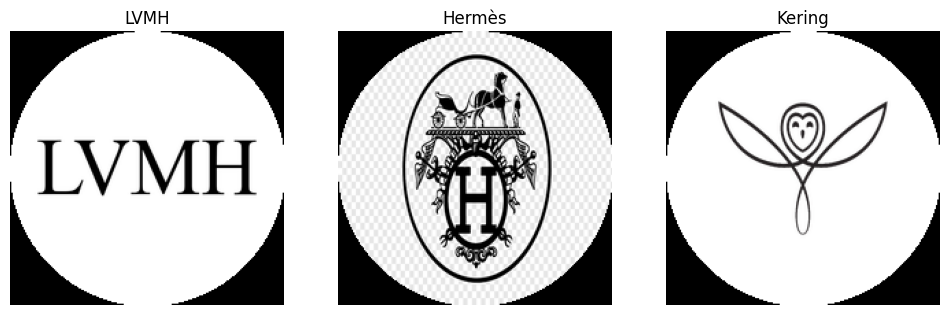

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def circular_logo_with_background(image_path, size):
    # Ouvrir l'image du logo (transparente)
    img = Image.open(image_path).convert("RGBA")

    # Redimensionner l'image du logo
    img = img.resize(size, Image.LANCZOS)

    # Créer un fond blanc
    background = Image.new("RGBA", size, (255, 255, 255, 255))

    # Créer un masque circulaire
    mask = Image.new("L", size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + size, fill=255)

    # Coller l'image transparente sur le fond blanc
    background.paste(img, (0, 0), img)

    # Appliquer le masque circulaire pour rendre tout en dehors du cercle transparent
    circular_logo = Image.composite(background, Image.new("RGBA", size, (0, 0, 0, 0)), mask)

    # Convertir le résultat en mode 'RGB' pour l'affichage
    circular_logo = circular_logo.convert("RGB")

    return circular_logo

def test_logos_display():
    # Remplacez les chemins par les chemins réels de vos images
    try:
        logo_lvmh = circular_logo_with_background("logo_lvmh.png", (200, 200))
        logo_hermes = circular_logo_with_background("logo_hermes.png", (200, 200))
        logo_kering = circular_logo_with_background("logo_kering.png", (200, 200))
    except Exception as e:
        print(f"Error loading or processing images: {e}")
        return

    # Convertir les images PIL en tableaux numpy
    logo_lvmh_np = np.array(logo_lvmh)
    logo_hermes_np = np.array(logo_hermes)
    logo_kering_np = np.array(logo_kering)

    # Afficher les logos
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    ax[0].imshow(logo_lvmh_np)
    ax[0].set_title('LVMH')
    ax[0].axis('off')

    ax[1].imshow(logo_hermes_np)
    ax[1].set_title('Hermès')
    ax[1].axis('off')

    ax[2].imshow(logo_kering_np)
    ax[2].set_title('Kering')
    ax[2].axis('off')

    plt.show()

# Exécuter la fonction de test
test_logos_display()


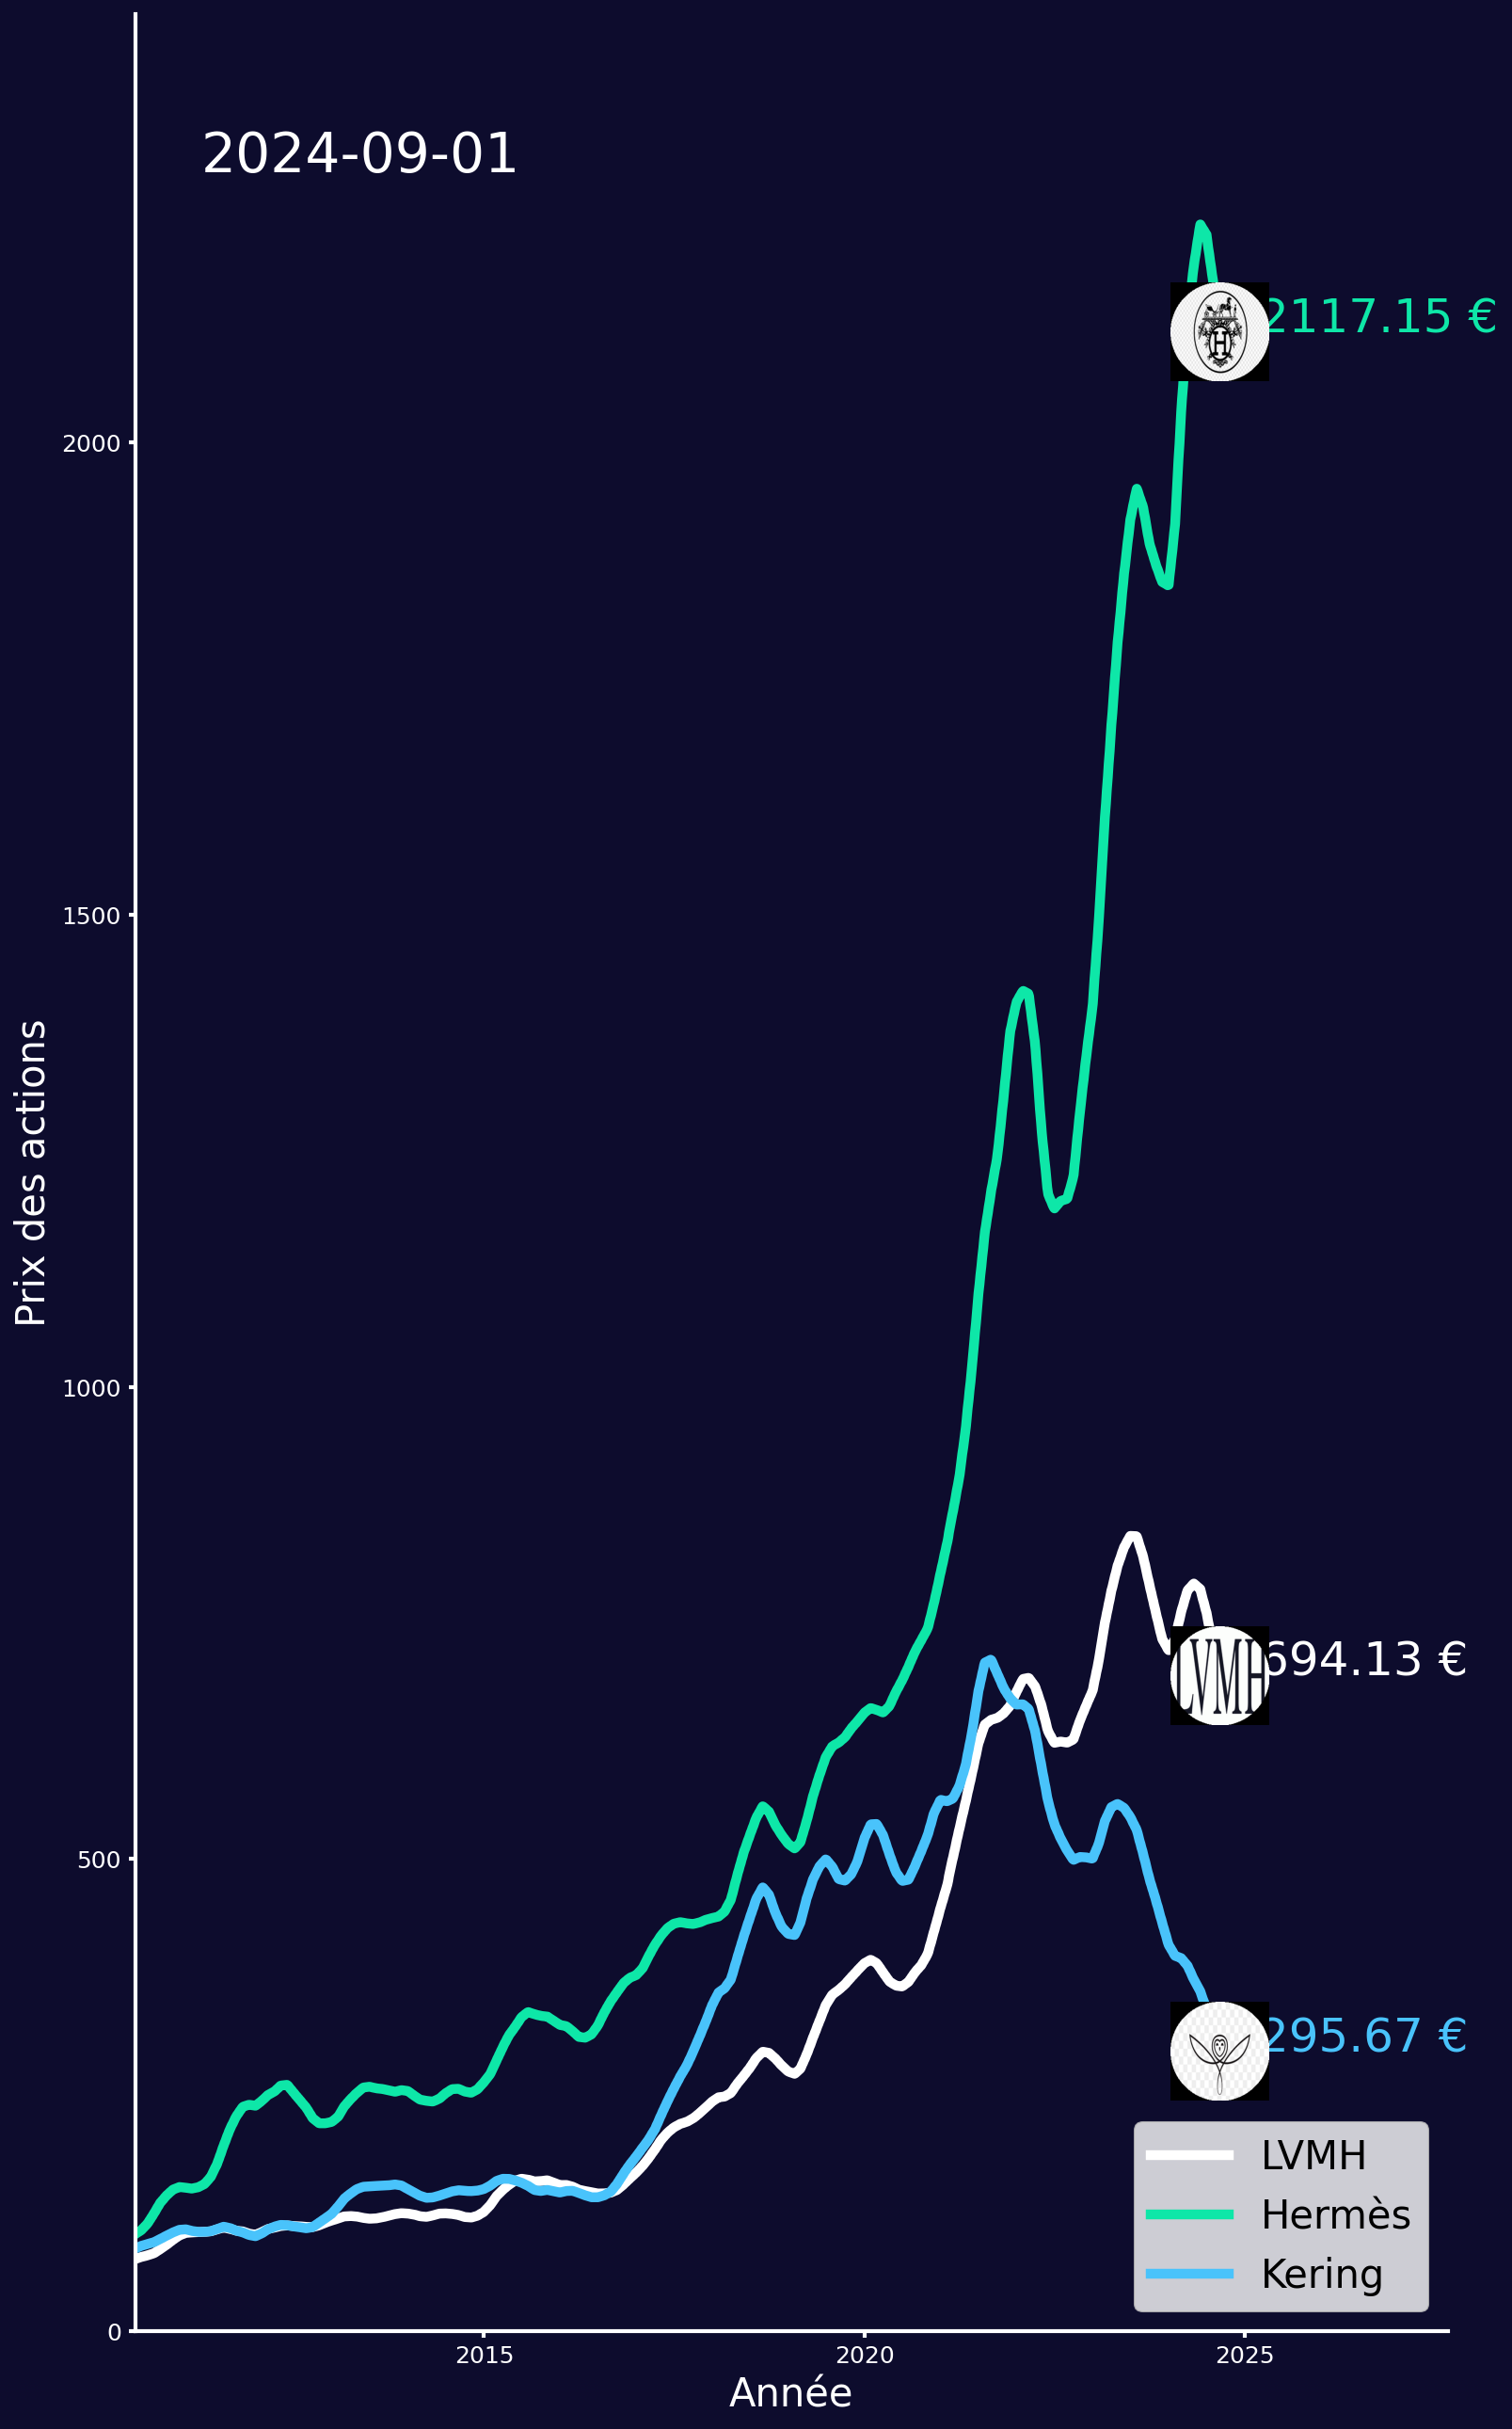

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageDraw
from datetime import datetime

def circular_logo_with_background(image_path, size):
    # Ouvrir l'image du logo (transparente)
    img = Image.open(image_path).convert("RGBA")

    # Redimensionner l'image du logo
    img = img.resize(size, Image.LANCZOS)

    # Créer un fond blanc
    background = Image.new("RGBA", size, (255, 255, 255, 255))

    # Créer un masque circulaire
    mask = Image.new("L", size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + size, fill=255)

    # Coller l'image transparente sur le fond blanc
    background.paste(img, (0, 0), img)

    # Appliquer le masque circulaire pour rendre tout en dehors du cercle transparent
    circular_logo = Image.composite(background, Image.new("RGBA", size, (0, 0, 0, 0)), mask)

    # Convertir le résultat en mode 'RGB' pour l'affichage
    circular_logo = circular_logo.convert("RGB")

    return circular_logo

def init():
    line_lvmh.set_data([], [])
    line_hermes.set_data([], [])
    line_kering.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, max(y_interp_lvmh.max(), y_interp_hermes.max(), y_interp_kering.max()) * 1.1)
    ax1.set_xlabel('Année', fontsize=20)
    ax1.set_ylabel('Prix des actions', fontsize=20, color='white')

    global date_counter
    date_counter = ax1.text(
        0.05, 0.95, '', transform=ax1.transAxes,
        fontsize=28, color='white', verticalalignment='top'
    )

    global logos, annotations
    logos = []
    annotations = []

    return line_lvmh, line_hermes, line_kering, date_counter

def update(frame):
    if frame < len(x_interp):
        line_lvmh.set_data(x_interp[:frame], y_interp_lvmh[:frame])
        line_hermes.set_data(x_interp[:frame], y_interp_hermes[:frame])
        line_kering.set_data(x_interp[:frame], y_interp_kering[:frame])

    if frame > 0:
        current_max_lvmh = np.nanmax(y_interp_lvmh[:frame]) * 1.1
        current_max_hermes = np.nanmax(y_interp_hermes[:frame]) * 1.1
        current_max_kering = np.nanmax(y_interp_kering[:frame]) * 1.1
        ax1.set_ylim(0, max(current_max_lvmh, current_max_hermes, current_max_kering))

        margin_years = 3
        end_date = x_interp.max() + np.timedelta64(margin_years * 365, 'D')
        ax1.set_xlim(x_interp.min(), end_date)

        for logo in logos:
            logo.remove()
        for ann in annotations:
            ann.remove()

        logos.clear()
        annotations.clear()

        annotations.append(
            ax1.annotate(
                f"{y_interp_lvmh[frame]:.2f} €", (x_interp[frame], y_interp_lvmh[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['LVMH'], fontsize=24
            )
        )
        annotations.append(
            ax1.annotate(
                f"{y_interp_hermes[frame]:.2f} €", (x_interp[frame], y_interp_hermes[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['Hermes'], fontsize=24
            )
        )
        annotations.append(
            ax1.annotate(
                f"{y_interp_kering[frame]:.2f} €", (x_interp[frame], y_interp_kering[frame]),
                textcoords="offset points", xytext=(20, 0), ha='left',
                color=colors['Kering'], fontsize=24
            )
        )

        # Charger les logos générés avec un fond blanc circulaire
        logo_lvmh = circular_logo_with_background("logo_lvmh.png", (200, 200))
        logo_hermes = circular_logo_with_background("logo_hermes.png", (200, 200))
        logo_kering = circular_logo_with_background("logo_kering.png", (200, 200))

        imagebox_lvmh = OffsetImage(logo_lvmh, zoom=0.25, resample=True)
        imagebox_hermes = OffsetImage(logo_hermes, zoom=0.25, resample=True)
        imagebox_kering = OffsetImage(logo_kering, zoom=0.25, resample=True)

        logo_lvmh_ab = AnnotationBbox(imagebox_lvmh, (x_interp[frame], y_interp_lvmh[frame]), frameon=False)
        logo_hermes_ab = AnnotationBbox(imagebox_hermes, (x_interp[frame], y_interp_hermes[frame]), frameon=False)
        logo_kering_ab = AnnotationBbox(imagebox_kering, (x_interp[frame], y_interp_kering[frame]), frameon=False)

        logos.extend([ax1.add_artist(logo_lvmh_ab), ax1.add_artist(logo_hermes_ab), ax1.add_artist(logo_kering_ab)])

        date_counter.set_text(f"{str(x_interp[frame])[:10]}")

    return line_lvmh, line_hermes, line_kering, date_counter

# Convertir la colonne 'Date' en format datetime
df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce')

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir les colonnes en float pour l'interpolation
df_final['Price_LVMH'] = pd.to_numeric(df_final['Price_LVMH'], errors='coerce')
df_final['Price_Hermes'] = pd.to_numeric(df_final['Price_Hermes'], errors='coerce')
df_final['Price_Kering'] = pd.to_numeric(df_final['Price_Kering'], errors='coerce')

# Interpolation pour combler les valeurs manquantes après fusion
df_final['Price_LVMH'] = df_final['Price_LVMH'].interpolate()
df_final['Price_Hermes'] = df_final['Price_Hermes'].interpolate()
df_final['Price_Kering'] = df_final['Price_Kering'].interpolate()

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_final.ffill(inplace=True)
df_final.fillna(0, inplace=True)

# Inverser l'ordre des dates
df_final = df_final.sort_values(by='Date')

# Appliquer une moyenne glissante (lissage) avec une fenêtre de 5 points
df_final['Price_LVMH'] = df_final['Price_LVMH'].rolling(window=5).mean()
df_final['Price_Hermes'] = df_final['Price_Hermes'].rolling(window=5).mean()
df_final['Price_Kering'] = df_final['Price_Kering'].rolling(window=5).mean()

# Supprimer les lignes contenant des NaN après le lissage
df_final = df_final.dropna(subset=['Price_LVMH', 'Price_Hermes', 'Price_Kering'])

# Préparer les données pour l'animation après avoir supprimé les NaN
x_data = df_final['Date'].values.astype('datetime64[D]')
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_lvmh = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_LVMH'])
y_interp_hermes = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_Hermes'])
y_interp_kering = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_Kering'])

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
colors = {'LVMH': 'white', 'Hermes': '#0EE7A8', 'Kering': '#49C3FB'}

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=12, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Lignes de données avec une épaisseur de ligne augmentée
line_lvmh, = ax1.plot([], [], lw=5, color=colors['LVMH'], label='LVMH')
line_hermes, = ax1.plot([], [], lw=5, color=colors['Hermes'], label='Hermès')
line_kering, = ax1.plot([], [], lw=5, color=colors['Kering'], label='Kering')

# Créer l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60)

plt.legend(loc='lower right', fontsize=20)

# Sauvegarder l'animation (optionnel)
ani.save("stock_prices_animation.mp4", fps=60, dpi=150)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw
from datetime import datetime

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

def init():
    line_lvmh.set_data([], [])
    line_hermes.set_data([], [])
    line_kering.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, max(y_interp_lvmh.max(), y_interp_hermes.max(), y_interp_kering.max()) * 1.1)
    ax1.set_xlabel('Année', fontsize=20)
    ax1.set_ylabel('Prix des actions', fontsize=20, color='white')

    global date_counter
    date_counter = ax1.text(
        0.05, 0.95, '', transform=ax1.transAxes,
        fontsize=28, color='white', verticalalignment='top'
    )

    global logos, annotations
    logos = []
    annotations = []

    return line_lvmh, line_hermes, line_kering, date_counter

def update(frame):
    if frame < len(x_interp):
        line_lvmh.set_data(x_interp[:frame], y_interp_lvmh[:frame])
        line_hermes.set_data(x_interp[:frame], y_interp_hermes[:frame])
        line_kering.set_data(x_interp[:frame], y_interp_kering[:frame])

    if frame > 0:
        current_max_lvmh = np.nanmax(y_interp_lvmh[:frame]) * 1.1
        current_max_hermes = np.nanmax(y_interp_hermes[:frame]) * 1.1
        current_max_kering = np.nanmax(y_interp_kering[:frame]) * 1.1
        ax1.set_ylim(0, max(current_max_lvmh, current_max_hermes, current_max_kering))

        margin_years = 3
        end_date = x_interp.max() + np.timedelta64(margin_years * 365, 'D')
        ax1.set_xlim(x_interp.min(), end_date)

        for logo in logos:
            logo.remove()
        for ann in annotations:
            ann.remove()

        logos.clear()
        annotations.clear()

        annotations.append(
            ax1.annotate(
                f"{y_interp_lvmh[frame]:.2f} €", (x_interp[frame], y_interp_lvmh[frame]),
                textcoords="offset points", xytext=(35, 0), ha='left',
                color=colors['LVMH'], fontsize=24
            )
        )
        annotations.append(
            ax1.annotate(
                f"{y_interp_hermes[frame]:.2f} €", (x_interp[frame], y_interp_hermes[frame]),
                textcoords="offset points", xytext=(35, 0), ha='left',
                color=colors['Hermes'], fontsize=24
            )
        )
        annotations.append(
            ax1.annotate(
                f"{y_interp_kering[frame]:.2f} €", (x_interp[frame], y_interp_kering[frame]),
                textcoords="offset points", xytext=(35, 0), ha='left',
                color=colors['Kering'], fontsize=24
            )
        )

        # Charger les logos générés avec un fond circulaire
        logo_lvmh = circular_mask("logo_lvmh.png", (200, 200))
        logo_hermes = circular_mask("logo_hermes.png", (200, 200))
        logo_kering = circular_mask("logo_kering.png", (200, 200))

        imagebox_lvmh = OffsetImage(logo_lvmh, zoom=0.25, resample=True)
        imagebox_hermes = OffsetImage(logo_hermes, zoom=0.25, resample=True)
        imagebox_kering = OffsetImage(logo_kering, zoom=0.25, resample=True)

        logo_lvmh_ab = AnnotationBbox(imagebox_lvmh, (x_interp[frame], y_interp_lvmh[frame]), frameon=False)
        logo_hermes_ab = AnnotationBbox(imagebox_hermes, (x_interp[frame], y_interp_hermes[frame]), frameon=False)
        logo_kering_ab = AnnotationBbox(imagebox_kering, (x_interp[frame], y_interp_kering[frame]), frameon=False)

        logos.extend([ax1.add_artist(logo_lvmh_ab), ax1.add_artist(logo_hermes_ab), ax1.add_artist(logo_kering_ab)])

        date_counter.set_text(f"{str(x_interp[frame])[:4]}")

    return line_lvmh, line_hermes, line_kering, date_counter

# Convertir la colonne 'Date' en format datetime
df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce')

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir les colonnes en float pour l'interpolation
df_final['Price_LVMH'] = pd.to_numeric(df_final['Price_LVMH'], errors='coerce')
df_final['Price_Hermes'] = pd.to_numeric(df_final['Price_Hermes'], errors='coerce')
df_final['Price_Kering'] = pd.to_numeric(df_final['Price_Kering'], errors='coerce')

# Interpolation pour combler les valeurs manquantes après fusion
df_final['Price_LVMH'] = df_final['Price_LVMH'].interpolate()
df_final['Price_Hermes'] = df_final['Price_Hermes'].interpolate()
df_final['Price_Kering'] = df_final['Price_Kering'].interpolate()

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_final.ffill(inplace=True)
df_final.fillna(0, inplace=True)

# Inverser l'ordre des dates
df_final = df_final.sort_values(by='Date')

# Appliquer une moyenne glissante (lissage) avec une fenêtre de 5 points
df_final['Price_LVMH'] = df_final['Price_LVMH'].rolling(window=2).mean()
df_final['Price_Hermes'] = df_final['Price_Hermes'].rolling(window=2).mean()
df_final['Price_Kering'] = df_final['Price_Kering'].rolling(window=2).mean()

# Supprimer les lignes contenant des NaN après le lissage
df_final = df_final.dropna(subset=['Price_LVMH', 'Price_Hermes', 'Price_Kering'])

# Préparer les données pour l'animation après avoir supprimé les NaN
x_data = df_final['Date'].values.astype('datetime64[D]')
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_lvmh = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_LVMH'])
y_interp_hermes = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_Hermes'])
y_interp_kering = np.interp(time_interp, np.arange(len(df_final)), df_final['Price_Kering'])

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
colors = {'LVMH': 'white', 'Hermes': '#0EE7A8', 'Kering': '#49C3FB'}

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=18, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=18, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Lignes de données avec une épaisseur de ligne augmentée
line_lvmh, = ax1.plot([], [], lw=5, color=colors['LVMH'], label='LVMH')
line_hermes, = ax1.plot([], [], lw=5, color=colors['Hermes'], label='Hermès')
line_kering, = ax1.plot([], [], lw=5, color=colors['Kering'], label='Kering')

# Créer l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60)

#Mettre la légende du graph
legend=plt.legend(loc='lower right', fontsize=20, frameon=False, facecolor='none')
plt.setp(legend.get_texts(), color='white')

# Sauvegarder l'animation (optionnel)
ani.save("stock_prices_animation.mp4", fps=60, dpi=150)
